# EDA Flu
## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)

## Importing the Flu dataset and display the first few rows

In [ ]:
df = pd.read_csv('Flu.csv')
df.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Show distribution of diagnosis

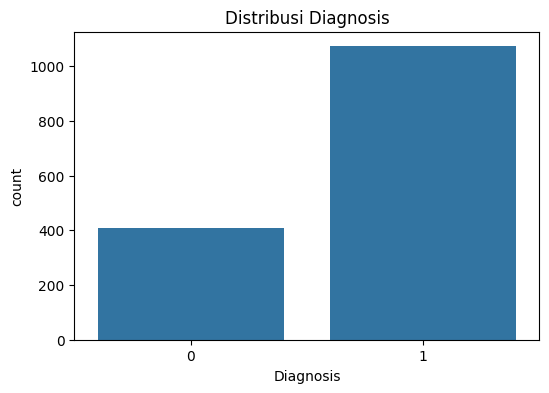

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribusi Diagnosis")
plt.show()



> Distribusi ini tidak seimbang (imbalanced), karena kelas 1 jauh lebih banyak dari kelas 0.
Jika dibiarkan, model cenderung akan bias ke kelas mayoritas (1).
Maka perlu SMOTE untuk menyeimbangkan jumlah data antar kelas sebelum training.



## Show the correlation of data

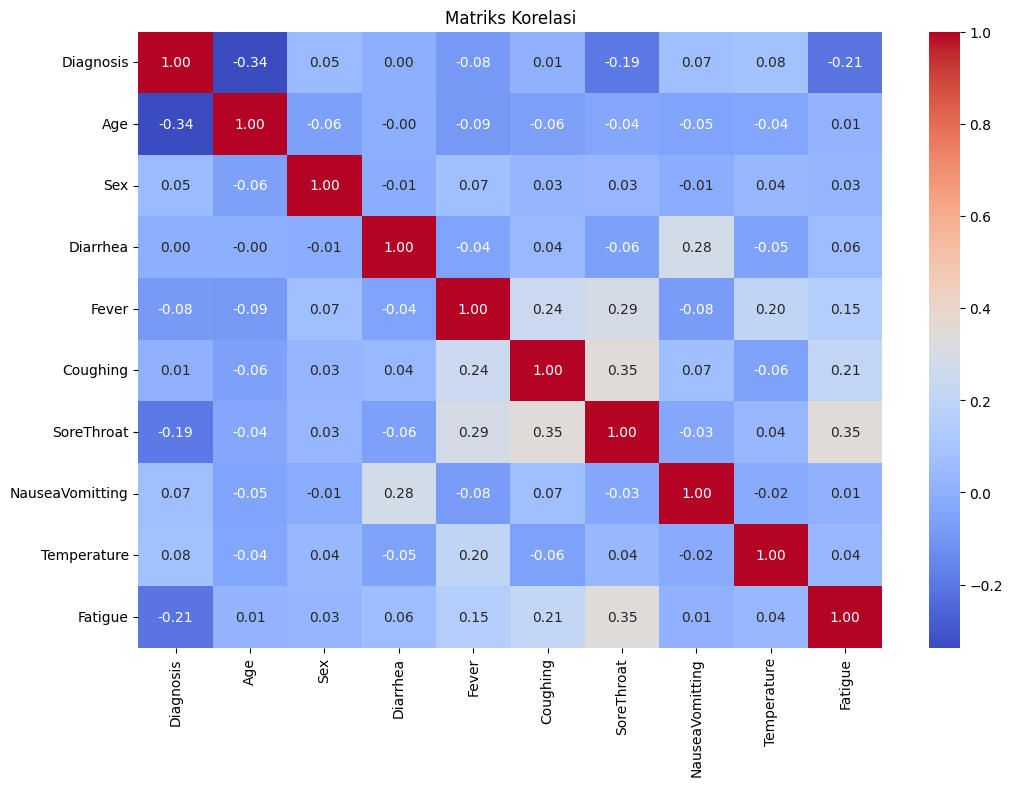

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()



> Gambar tersebut menunjukkan hubungan antar fitur dalam bentuk matriks korelasi. Nilai korelasi berkisar antara -1 hingga 1, di mana 1 berarti korelasi positif sempurna, -1 korelasi negatif sempurna, dan 0 berarti tidak ada korelasi linier. Terlihat bahwa tidak ada fitur yang memiliki korelasi kuat terhadap Diagnosis



## Show the diagnosis based on age

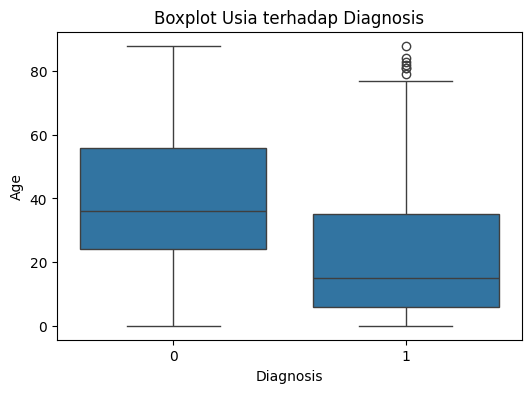

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title("Boxplot Usia terhadap Diagnosis")
plt.show()



> Boxplot tersebut menunjukkan distribusi usia berdasarkan status diagnosis flu. Terlihat bahwa pasien tanpa flu (Diagnosis = 0) memiliki rentang usia yang lebih tinggi, dengan median sekitar 40 tahun. Sementara itu, pasien dengan flu (Diagnosis = 1) cenderung berusia lebih muda, dengan median sekitar 15 tahun dan beberapa outlier pada usia lanjut. Hal ini mengindikasikan bahwa dalam dataset ini, flu lebih sering terjadi pada kelompok usia yang lebih muda.



## Show the temperature distribution

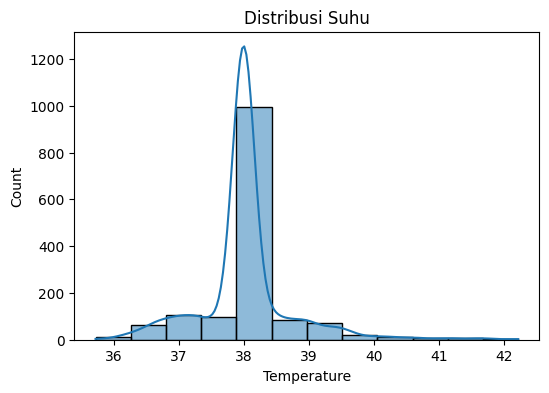

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Temperature'], kde=True)
plt.title("Distribusi Suhu")
plt.show()



> Grafik tersebut adalah grafik yang menunjukkan distribusi suhu tubuh pasien. Distribusinya tampak mendekati normal, dengan puncak di sekitar 38°C, yang menunjukkan sebagian besar pasien memiliki suhu tinggi. Hal ini sesuai dengan gejala flu yang umum, yaitu demam. Selain itu, terdapat sedikit sebaran ke kanan (right-skewed) yang menandakan adanya sebagian kecil pasien dengan suhu lebih tinggi dari normal.



## Prepare the model and predict the test data

In [ ]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Cek distribusi label setelah SMOTE
print("Distribusi label setelah SMOTE:")
print(pd.Series(y_train).value_counts())

# Model: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Distribusi label setelah SMOTE:
Diagnosis
1    865
0    865
Name: count, dtype: int64


## Evaluate the model

=== Evaluasi Model ===
Akurasi  : 0.7542
Presisi  : 0.8418
Recall   : 0.7971
F1 Score : 0.8189
AUC      : 0.7972


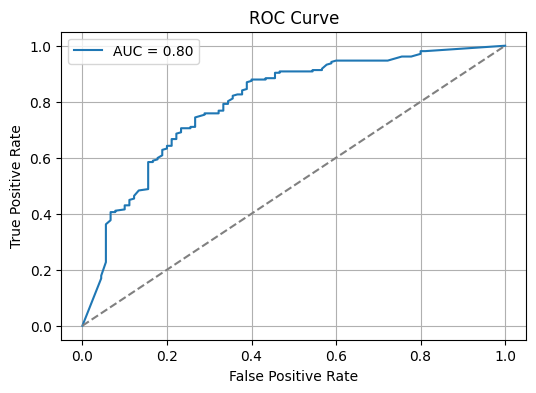

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_proba)

print("=== Evaluasi Model ===")
print(f"Akurasi  : {acc:.4f}")
print(f"Presisi  : {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()



> Grafik ROC Curve menunjukkan performa model dalam membedakan kelas positif dan negatif. Dengan nilai AUC sebesar 0.80, model memiliki kemampuan klasifikasi yang baik, karena semakin mendekati 1 berarti semakin akurat. Kurva yang menjauh dari garis diagonal menandakan model bekerja lebih baik dari tebakan acak.



## Accuracy
Proporsi prediksi yang benar terhadap seluruh data:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

## Precision
Presisi mengukur seberapa banyak dari prediksi positif yang benar-benar positif:

$$
Precision = \frac{TP}{TP + FP}
$$

---

## Recall
Recall mengukur seberapa banyak dari data positif yang berhasil dikenali:

$$
Recall = \frac{TP}{TP + FN}
$$

---

## F1 Score
F1 adalah rata-rata harmonik dari Precision dan Recall:

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

---

## ROC Curve & AUC

#### a. False Positive Rate (FPR)
$$
FPR = \frac{FP}{FP + TN}
$$

#### b. True Positive Rate (TPR) / Recall
$$
TPR = \frac{TP}{TP + FN}
$$

#### c. AUC (Area Under Curve)
AUC adalah luas di bawah kurva ROC yang memetakan TPR vs FPR. Semakin tinggi AUC, semakin baik model membedakan antara kelas.

---

### 📌 Keterangan:
- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative
